<a href="https://colab.research.google.com/github/Eric-Chung-0511/Learning-Record/blob/main/General%20Helpers/Examples/Convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to CNN
* The Data is from Kaggle - Food101

In [ ]:
# Get the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-05-25 11:14:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.139.207, 74.125.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   173MB/s    in 0.6s    

2024-05-25 11:14:19 (173 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data
* For a computer vision project, usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directions and {len(filenames)} image in '{dirpath}'.")

There are 2 directions and 0 image in 'pizza_steak'.
There are 2 directions and 0 image in 'pizza_steak/test'.
There are 0 directions and 250 image in 'pizza_steak/test/steak'.
There are 0 directions and 250 image in 'pizza_steak/test/pizza'.
There are 2 directions and 0 image in 'pizza_steak/train'.
There are 0 directions and 750 image in 'pizza_steak/train/steak'.
There are 0 directions and 750 image in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

### To visualize images

In [ ]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_name = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_name from the subdirector
print(class_name)

['pizza' 'steak']


In [ ]:
# visualize the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path, randomly sample one of the item in target_folder
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  # show the shape of the image
  print(f'Image shape: {img.shape}')

  return img

['3704103.jpg']
Image shape: (512, 512, 3)


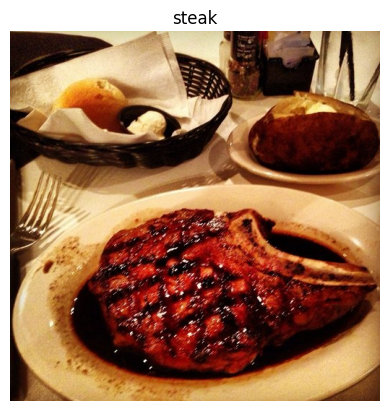

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
# View the img shape
img.shape

(512, 512, 3)

### Build Model
* For workimg with images is to scale their pixel values by deviding the image arrays bt 255 (since 255 is the maximum pixel value)
* Preprocess the images


#### ImageDataGeneratoor parameters
```python
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                                   rotation_range=40,  # Range of random rotations
                                   width_shift_range=0.2,  # Range of random horizontal shifts
                                   height_shift_range=0.2,  # Range of random vertical shifts
                                   shear_range=0.2,  # Range of random shear transformations
                                   zoom_range=0.2,  # Range of random zoom
                                   horizontal_flip=True,  # Randomly flip images horizontally
                                   fill_mode='nearest')  # Fill mode for points outside the boundaries


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Preprocess data (scale the data)
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import Data from directories and turn into batches
# target_size can be your choice, but 224,224 is common
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


- **filters**: The number of convolutional filters. This determines the number of output feature maps produced by this layer. Here, it is `32`, which means `filters`.
- **kernel_size**: The size of the convolutional kernel. Here, `(3, 3)` indicates that the height and width of each filter are 3 pixels.
- **activation**: The activation function. Here, the `'relu'` activation function is used, which is commonly employed to introduce non-linearity.
- **input_shape**: The shape of the input. This only needs to be specified in the first layer. Here, `(224, 224, 3)` represents the height, width, and channels of the input image.
- **pool_size**: The size of the pooling window. Here, `(2, 2)` indicates the size of the window considered for each pooling operation.
- **units**: The number of neurons. For a fully connected layer, this indicates the number of neurons in the layer.
- **optimizer**: The optimizer. Here, the `'adam'` optimizer is used.
- **loss**: The loss function. Here, `sparse_categorical_crossentropy` is used, which is suitable for multi-class classification problems.
- **metrics**: The evaluation metric. Here, `'accuracy'` is used as the metric to evaluate the model's performance.



In [ ]:
# valid_data is test_data
len(train_data), len(valid_data)

(47, 16)

In [ ]:
# Build CNN Model
model_1 = Sequential()

# First convolutional layer, using 3x3 kernel for the first layer for demonstration
model_1.add(Conv2D(10, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# Second convolutional layer: further extracts higher-level features such as shapes, textures, and more complex structures of objects based on the low-level features extracted by the previous layer.
model_1.add(Conv2D(10, 3, activation='relu'))
# First max pooling layer, pool_size=2 (2, 2)
model_1.add(MaxPooling2D(pool_size=2, padding='valid'))

# Third convolutional layer
model_1.add(Conv2D(10, 3, activation='relu'))
# Fourth convolutional layer
model_1.add(Conv2D(10, 3, activation='relu'))
# Second max pooling layer, pool_size=2 (2, 2)
model_1.add(MaxPooling2D(2))

model_1.add(Flatten())

# Output layer
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train_data is a combination of labels and sample data, so no need to fit like X, y
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 110s 2s/step - loss: 0.5570 - accuracy: 0.7147 - val_loss: 0.4232 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 115s 2s/step - loss: 0.4177 - accuracy: 0.8127 - val_loss: 0.3316 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 102s 2s/step - loss: 0.3932 - accuracy: 0.8340 - val_loss: 0.3259 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.3700 - accuracy: 0.8507 - val_loss: 0.3528 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 117s 2s/step - loss: 0.3154 - accuracy: 0.8713 - val_loss: 0.3217 - val_accuracy: 0.8600


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using the same model as before
* **In Computer vision use CNN**

In [ ]:
# Create a model to replicate the Tensorflow Playground Model
model_2 = Sequential()

model_2.add(Flatten(input_shape=(224, 224, 3)))

model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(4, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 138ms/step - loss: 1.4714 - accuracy: 0.6747 - val_loss: 0.5637 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6730 - accuracy: 0.7413 - val_loss: 1.4243 - val_accuracy: 0.5420
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6104 - accuracy: 0.7540 - val_loss: 0.7007 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4980 - accuracy: 0.7780 - val_loss: 0.4508 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4542 - accuracy: 0.7813 - val_loss: 0.5463 - val_accuracy: 0.7300


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Imporve model_2 performance
model_3 = Sequential()

model_3.add(Flatten(input_shape=(224, 224, 3)))

model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(100, activation='relu'))

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 108ms/step - loss: 7.7685 - accuracy: 0.6260 - val_loss: 4.2427 - val_accuracy: 0.5660
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 1.6658 - accuracy: 0.6987 - val_loss: 0.6569 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.7724 - accuracy: 0.7213 - val_loss: 1.2409 - val_accuracy: 0.5980
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6140 - accuracy: 0.7527 - val_loss: 1.0402 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6148 - accuracy: 0.7653 - val_loss: 0.4409 - val_accuracy: 0.7880


In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Binary Classification:
1. Become one with the data (visualize)
2. Preprocess the data (prepared model, scaled data)
3. Create a model (CNN)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

* **Model without pooling layers:** Without reducing the size of feature maps, more feature information may be retained. However, the computational complexity and the number of parameters increase, leading to longer training times and a higher risk of overfitting.
* **Model with pooling layers:** By reducing the size of feature maps, the computational complexity and the number of parameters are effectively reduced. This speeds up the training process and decreases the risk of overfitting.

In [ ]:
# Preprocess data (scale the data)
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)
test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Evaluate the Model

<Axes: >

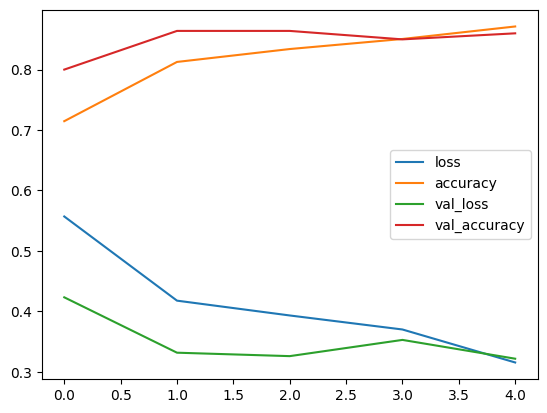

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  # The total of epochs
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

  # Plot accuracy
  plt.figure() # to separate two plots
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

### Use MaxPooling Layer to prevent overfitting

In [ ]:

# Add 3 Conv2D, 3 MaxPooling
model_6 = Sequential()

model_6.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_6.add(MaxPooling2D(pool_size=2)) # reduce number of features by half

model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPooling2D())  # reduce number of features by half

model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPooling2D())

model_6.add(Flatten())

model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_6 = model_6.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 61s 1s/step - loss: 0.6283 - accuracy: 0.6447 - val_loss: 0.5047 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.4847 - accuracy: 0.7840 - val_loss: 0.3769 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 57s 1s/step - loss: 0.4135 - accuracy: 0.8193 - val_loss: 0.3323 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 57s 1s/step - loss: 0.3868 - accuracy: 0.8287 - val_loss: 0.3099 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 53s 1s/step - loss: 0.3712 - accuracy: 0.8447 - val_loss: 0.3847 - val_accuracy: 0.8120


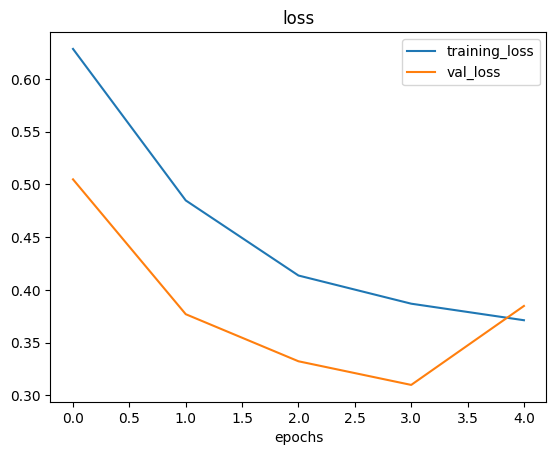

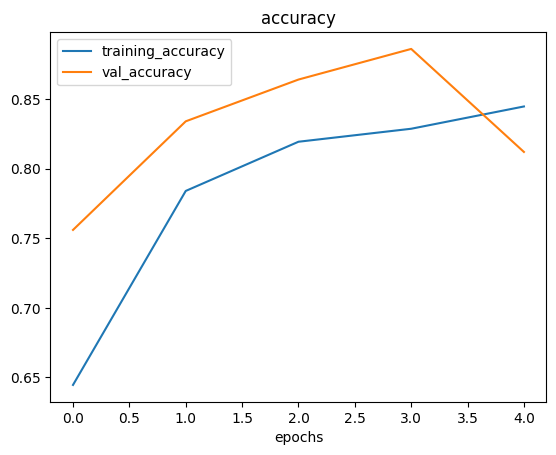

In [ ]:
plot_loss_curves(history_6)

### Data Augmented

- **rescale**: Scales the pixel values to the range [0, 1]. Typically set to `1/255` because the original pixel values range from [0, 255]. After rescaling, the pixel values will be in the range [0, 1].
- **rotation_range**: The range of angles for random rotations of the image. `rotation_range=20` means the image will be randomly rotated between -20 and 20 degrees.
- **shear_range**: The range for random shear transformations. `shear_range=0.2` means the shear angle will vary between -20% and 20%.
- **zoom_range**: The range for random zooming of the image. `zoom_range=0.2` means the image will be randomly zoomed in or out by 80% to 120%.
- **width_shift_range**: The range for random horizontal shifts of the image. `width_shift_range=0.2` means the image will be randomly shifted horizontally by -20% to 20%.
- **height_shift_range**: The range for random vertical shifts of the image. `height_shift_range=0.2` means the image will be randomly shifted vertically by -20% to 20%.
- **horizontal_flip**: Randomly flips the image horizontally. `horizontal_flip=True` means the image will be randomly flipped horizontally.


In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255, rotation_range=20, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2,
                                             height_shift_range=0.2, horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print('Augmented Training Data:')

# Usually, Shuffle must be True, but this is just for learning
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

# Create non-augmented train data batches
print('Non-Augmented Training Data:')
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

# Create non-augmented test data batches, default is shuffle=True
print('Non-Augmented Testing Data:')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Testing Data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on **training data**

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 4


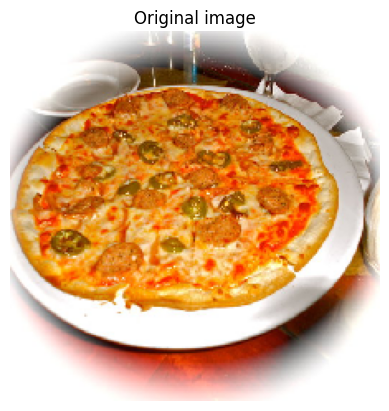

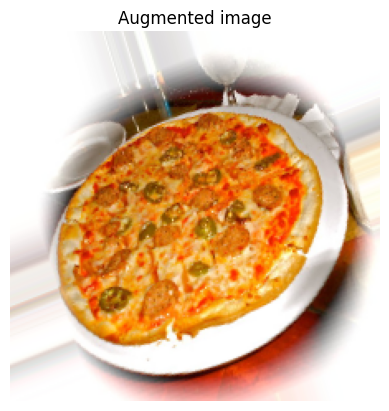

In [ ]:
# show original image and augmented image
random_number = random.randint(0, 32)  # the batch sizes are
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

### Use Augmented Data to fit in CNN Model

In [ ]:
model_7 = Sequential()

model_7.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_7.add(MaxPooling2D(pool_size=2))

model_7.add(Conv2D(10, 3, activation='relu'))
model_7.add(MaxPooling2D())

model_7.add(Conv2D(10, 3, activation='relu'))
model_7.add(MaxPooling2D())

model_7.add(Flatten())

model_7.add(Dense(1, activation='sigmoid'))

model_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_7.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
            validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.7013 - accuracy: 0.5727 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.6856 - accuracy: 0.5073 - val_loss: 0.6617 - val_accuracy: 0.5840
Epoch 3/5
47/47 [==============================] - 75s 2s/step - loss: 0.6776 - accuracy: 0.5473 - val_loss: 0.6495 - val_accuracy: 0.5140
Epoch 4/5
47/47 [==============================] - 74s 2s/step - loss: 0.6500 - accuracy: 0.6040 - val_loss: 0.5407 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 70s 1s/step - loss: 0.6532 - accuracy: 0.6400 - val_loss: 0.5537 - val_accuracy: 0.7740


In [ ]:
# let train_data_augmented shuffle to be True
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True)

model_8 = Sequential()

"""
Typically, incrementally increasing the number of convolutional filters while using a fixed kernel size can help build a more efficient model.
However, due to hardware limitations and the need for extended training times, we are using a fixed kernel size.
Additionally, since the dataset is relatively simple, we have omitted the fully connected layer.
In more complex tasks, this could reduce the feature extraction capability.
Therefore, it is recommended to include a fully connected layer for more complex tasks.

model_8.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model_8.add(Conv2D(32, 3, activation='relu'))
model_8.add(MaxPooling2D(pool_size=2))

model_8.add(Conv2D(64, 3, activation='relu'))
model_8.add(Conv2D(64, 3, activation='relu'))
model_8.add(MaxPooling2D())

model_8.add(Conv2D(128, 3, activation='relu'))
model_8.add(Conv2D(128, 3, activation='relu'))
model_8.add(MaxPooling2D())

model_8.add(Dense(128, activation='relu')) # Full connect layer
model_8.add(Dense(1, activation='sigmoid'))

"""
model_8.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(MaxPooling2D(pool_size=2))

model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(MaxPooling2D())

model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(Conv2D(10, 3, activation='relu'))
model_8.add(MaxPooling2D())

model_8.add(Flatten())

# Full connect layer
# model_8.add(Dense(10, activation='relu'))

# output layer
model_8.add(Dense(1, activation='sigmoid'))

model_8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 156s 3s/step - loss: 0.6531 - accuracy: 0.6280 - val_loss: 0.5246 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 142s 3s/step - loss: 0.5549 - accuracy: 0.7480 - val_loss: 0.4655 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 143s 3s/step - loss: 0.5493 - accuracy: 0.7320 - val_loss: 0.4207 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 150s 3s/step - loss: 0.5159 - accuracy: 0.7647 - val_loss: 0.3940 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 148s 3s/step - loss: 0.5209 - accuracy: 0.7587 - val_loss: 0.4423 - val_accuracy: 0.7940


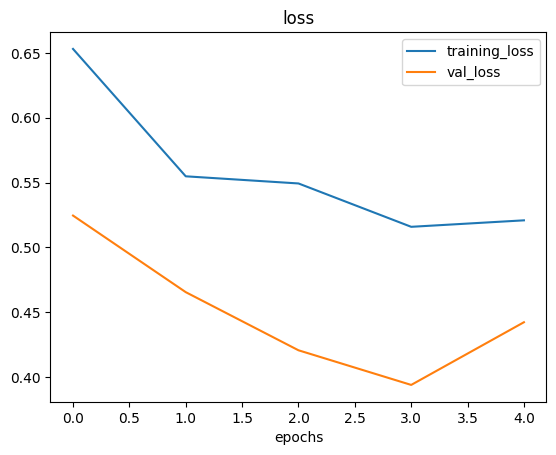

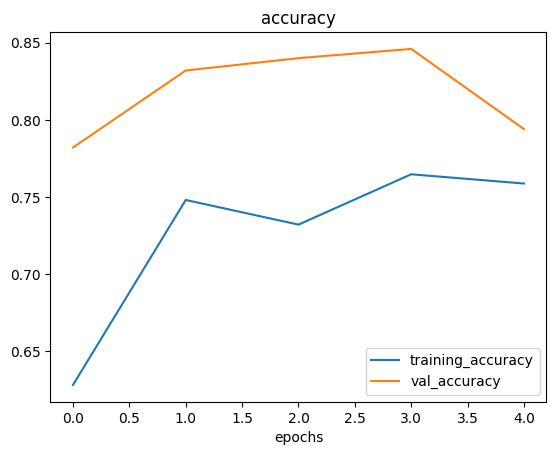

In [ ]:
plot_loss_curves(history_8)

### Making prediction with our trained model
* **Model_1** perform the best, so use it to predict

In [ ]:
# Classes we're working with
print(class_name)

['pizza' 'steak']


--2024-05-25 13:29:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-05-25 13:29:25 (27.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



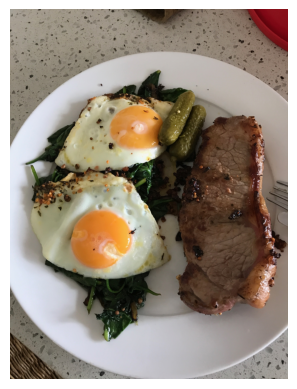

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)


🔑 Note:
* For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on.
* In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [ ]:
import tensorflow as tf

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

 # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255

  # Add batch dimension
  img = tf.expand_dims(img, axis=0)
  return img

In [ ]:
# Load in and preprocess the custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 66ms/step


array([[0.90001136]], dtype=float32)

### Visualize the images

In [ ]:
class_name

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Index the predicted class by rounding the prediction probability and indexing it on the class name
# looks like the model predict well
pred_class = class_name[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_name=class_name):
  """
 Imports an image located at the filename, makes a prediction with the model, and plots the image with the predicted class as the title.

`pred` is the prediction result from the model. Assuming your model is a binary classification model, `pred` will be a tensor of shape (1, 1)
 containing a single prediction value. For example, `pred` might be [[0.8]].

`tf.round(pred)` rounds the prediction value. `tf.round([[0.8]])` will result in [[1.0]].

`tf.round(pred)[0][0]` extracts the numerical value from the prediction result. `tf.round(pred)` is [[1.0]], so `tf.round(pred)[0][0]` is 1.0.

`int(tf.round(pred)[0][0])` converts the float 1.0 to the integer 1.

`class_names[int(tf.round(pred)[0][0])]` uses the integer 1 as an index to find the corresponding class name in the `class_names` list.

  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(img)

  # Get the predicted class
  pred_class = class_name[int(tf.round(pred)[0][0])]

  # Remove batch dimension for plotting
  img = tf.squeeze(img, axis=0)

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 136ms/step


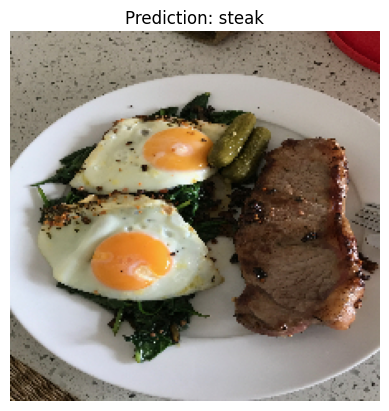

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1, '03-steak.jpeg')

### Predict another image

--2024-05-25 14:25:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2024-05-25 14:25:04 (35.6 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 374ms/step


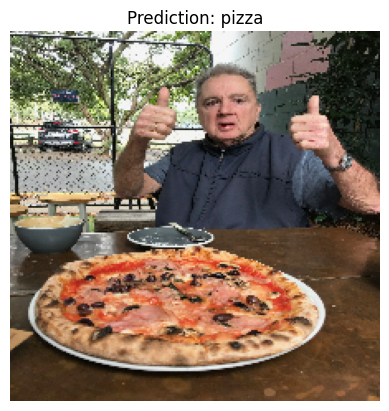

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_1, "03-pizza-dad.jpeg", class_name)